<a href="https://colab.research.google.com/github/Fazira2025/weatherwise-harahap-zizi/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---


## 📦 Setup and Configuration
Import required packages and setup environment.

In [1]:
import requests
import matplotlib.pyplot as plt

## 🌤️ Weather Data Functions

In [2]:
def get_weather_data(location, format_type='plaintext'):
    """
    Get weather data from wttr.in API
    Args:
        location (str): City name or location
    Returns:
        str: Weather data in text format or None if an error occurs
    Raises:
        Various requests exceptions which are caught and printed
    """
    try:
        if format_type.lower() == "json":
            url = f'https://wttr.in/{location}?format=j1'
        else:
            url = f'https://wttr.in/{location}'

        response = requests.get(url, timeout=10)
        response.raise_for_status()

        if format_type.lower() == "json":
            return response.json()
        else:
            print(response.text)
            return None
    except requests.exceptions.HTTPError as errh:
        print(f"HTTP Error: {errh}")
    except requests.exceptions.ConnectionError as errc:
        print(f"Connection Error: {errc}")
    except requests.exceptions.Timeout as errt:
        print(f"Timeout Error: {errt}")
    except requests.exceptions.TooManyRedirects as errr:
        print(f"Redirect Error: {errr}")
    except requests.exceptions.RequestException as err:
        print(f"Unknown Error: {err}")

    return None

## 📊 Visualisation Functions

In [3]:
def create_temperature_visualisation(location):
    data = get_weather_data(location, format_type="json")
    if data is None:
        print("Failed to retrieve weather data.")
        return

    try:
        weather_days = data['weather']  # List of daily forecasts
    except KeyError:
        print("Unexpected data format.")
        return

    print("-" * 53)
    print(f"{'ACTIVITY':^53}")
    print("-" * 53)

    # For demonstration, show info for each day in the forecast
    for day in weather_days:
        date = day.get('date', 'Unknown Date')
        # Format date nicely (optional: convert 'YYYY-MM-DD' to e.g. Thursday, 22 May 2025)
        # Let's do simple parsing using datetime:
        from datetime import datetime
        try:
            dt_obj = datetime.strptime(date, "%Y-%m-%d")
            formatted_date = dt_obj.strftime("%A, %d %B %Y")
        except Exception:
            formatted_date = date

        weather_desc = day.get('hourly', [{}])[4].get('weatherDesc', [{'value': 'N/A'}])[0]['value']  # Midday weather desc
        mintempC = day.get('mintempC', 'N/A')
        maxtempC = day.get('maxtempC', 'N/A')
        avgtempC = day.get('avgtempC', 'N/A')

        print(f"Location   : {location.capitalize()}")
        print(f"Date       : {formatted_date}")
        print(f"Weather    : {weather_desc}")
        print(f"Temperature: Min {mintempC}°C | Max {maxtempC}°C | Avg {avgtempC}°C")
        print("-" * 53)

In [4]:
def create_precipitation_visualisation(location, day_index=0):
    data = get_weather_data(location, 'json')
    if not data:
        print("Failed to get data.")
        return

    hourly = data['weather'][day_index]['hourly']
    times = [f"{int(h['time'])//100:02d}:00" for h in hourly]
    precip = [float(h['precipMM']) for h in hourly]
    rain_chance = [int(h['chanceofrain']) for h in hourly]

    fig, ax1 = plt.subplots()

    ax1.plot(times, precip, 'b-o', label='Precipitation (mm)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Precipitation (mm)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(times, rain_chance, 'g--x', label='Chance of Rain (%)')
    ax2.set_ylabel('Chance of Rain (%)', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    if day_index == 0:
        days = 'Today'
    elif day_index == 1:
        days = 'Tomorrow'
    else:
        days = 'After-Tomorrow'

    plt.title(f'{days} Graphical Representation of Precipitation and Rainfall Probability at {location.capitalize()}')
    plt.grid(True)
    plt.show()

## 🤖 Natural Language Processing

## 🧭 User Interface

In [5]:
def main():
  name = input('🤖: Hi! Please enter your name: ')
  location = input(f'🤖: Which location would you like to check, {name}? ')
  while True:
        print(f'🤖 Hello! {name}, Welcome to Weather Wise. How can I help you at {location}?')
        print("-" * 53)
        print('Please enter your choice (1 - 5):')
        print(f'1. Check Current Weather & View Weather Forecast at {location}')
        print(f'2. Check Current Weather Hourly at {location}')
        print(f'3. Activities Suggestions & Weather Prediction assistant at {location}')
        print('4. Check Other Location')
        print('5. Exit Program')

        choice = input('Enter your choice (1-5): ')

        if choice == "1":
           get_weather_data(location)
        elif choice == "2":
            print("Select day for weather visualization:")
            print("1. Today")
            print("2. Tomorrow")
            print("3. Day after tomorrow")
            day_choice = input("Enter choice (1-3): ").strip()
            if day_choice in ['1', '2', '3']:
                day_index = int(day_choice) - 1  # Convert to 0-based index
            else:
                print("Invalid choice, defaulting to Today.")
                day_index = 0
            create_precipitation_visualisation(location, day_index=day_index)
        elif choice == "3":
            create_temperature_visualisation(location)
        elif choice == "4":
            location = input("Enter new location: ")
            print(f"Location updated to {location}")
        elif choice == "5":
            print(f'Thankyou! Have a nice day {name} 🌸')
            break
        else:
            print("\033[1;31mInvalid choice. Please type 1-5 as a number!\033[0m") #error_handling


## 🧩 Main Application Logic

                    Weather Wise                   
🤖: Hi! Please enter your name: Z
🤖: Which location would you like to check, Z? Perth
🤖 Hello! Z, Welcome to Weather Wise. How can I help you at Perth?
-----------------------------------------------------
Please enter your choice (1 - 5):
1. Check Current Weather & View Weather Forecast at Perth
2. Check Current Weather Hourly at Perth
3. Activities Suggestions & Weather Prediction assistant at Perth
4. Check Other Location
5. Exit Program
Enter your choice (1-5): 3
-----------------------------------------------------
                      ACTIVITY                       
-----------------------------------------------------
Location   : Perth
Date       : Friday, 23 May 2025
Weather    : Patchy rain nearby
Temperature: Min 13°C | Max 16°C | Avg 15°C
-----------------------------------------------------
Location   : Perth
Date       : Saturday, 24 May 2025
Weather    : Partly Cloudy 
Temperature: Min 11°C | Max 15°C | Avg 13°C
-------

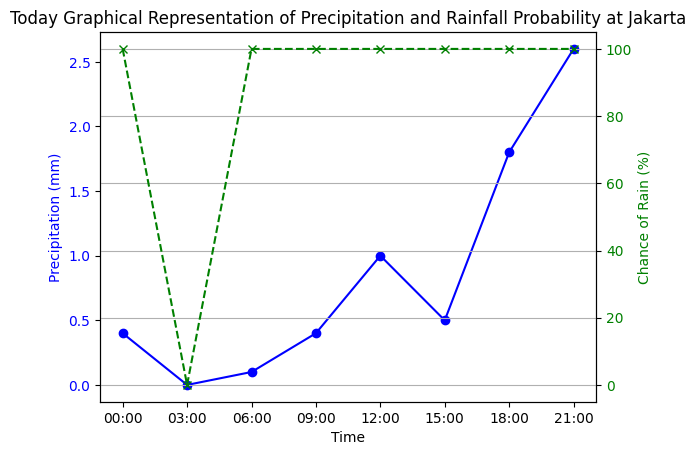

🤖 Hello! Z, Welcome to Weather Wise. How can I help you at Jakarta?
-----------------------------------------------------
Please enter your choice (1 - 5):
1. Check Current Weather & View Weather Forecast at Jakarta
2. Check Current Weather Hourly at Jakarta
3. Activities Suggestions & Weather Prediction assistant at Jakarta
4. Check Other Location
5. Exit Program
Enter your choice (1-5): 5
Thankyou! Have a nice day Z 🌸


In [6]:
# Tie everything together here
if __name__ == "__main__":
    title = "Weather Wise"
    blue_bold = "\033[1;94m"  # 1 for bold, 94 for light blue
    color = "\033[0m"

    print("=" * 53)
    print("" + blue_bold + title.center(51) + color + "")
    print("=" * 53)

    main()

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.